# **Project Name**    - Predictive Analysis & Insights Generation Using Machine Learning



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Rakesh Mahakur


# **Project Summary -**

This project focuses on performing end-to-end data analysis and machine learning modeling to extract meaningful insights and build predictive models that support data-driven decision-making. The workflow begins with understanding the dataset structure, identifying data quality issues, and performing exploratory data analysis (EDA) to uncover patterns, trends, and relationships between variables.

Initially, the dataset was examined for size, data types, duplicate records, and missing values. Data cleaning and preprocessing steps were applied to handle null values, remove duplicates, correct inconsistent formats, and prepare the dataset for analysis. Feature understanding and variable categorization (numerical and categorical) played a crucial role in selecting appropriate visualization techniques and modeling approaches.

Exploratory Data Analysis was conducted following the UBM rule:

Univariate Analysis to understand individual variable distributions

Bivariate Analysis to study relationships between two variables

Multivariate Analysis to analyze interactions among multiple features

A minimum of 15 meaningful visualizations were created using appropriate charts such as bar plots, box plots, histograms, scatter plots, heatmaps, and count plots. Each visualization was carefully chosen to answer a specific business or analytical question and was accompanied by insights explaining trends, anomalies, and potential business implications.

After EDA, machine learning models were built to predict the target variable. Multiple algorithms were tested to compare performance. The dataset was split into training and testing sets, and model evaluation was performed using suitable metrics such as Accuracy, Precision, Recall, F1-score, RMSE, or R², depending on the problem type. Cross-validation and hyperparameter tuning were applied to improve model performance and reduce overfitting.

The final model demonstrated improved performance after tuning and was evaluated not only on technical metrics but also on its potential business impact. The project concludes by translating analytical findings into actionable insights that can help organizations optimize performance, reduce risk, and support strategic decisions.

# **GitHub Link -**

https://github.com/rakesh-analytics-ops

# **Problem Statement**


The goal of this project is to analyze Zomato restaurant data to identify key factors influencing restaurant ratings and customer reviews, and to build a machine learning model that can predict restaurant ratings based on features such as location, cuisine, pricing, and service availability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')


In [5]:
import os
os.listdir(r"D:\LABMENTIX\Zomato Project-20260103T144828Z-1-001\Zomato Project")



['Sample_ML_Submission_Template.ipynb',
 'Zomato Restaurant names and Metadata.csv',
 'Zomato Restaurant reviews.csv']

### Dataset Loading

In [6]:
restaurants_df = pd.read_csv(
    r"D:\LABMENTIX\Zomato Project-20260103T144828Z-1-001\Zomato Project\Zomato Restaurant names and Metadata.csv"
)

reviews_df = pd.read_csv(
    r"D:\LABMENTIX\Zomato Project-20260103T144828Z-1-001\Zomato Project\Zomato Restaurant reviews.csv"
)

print("Restaurants Dataset Shape:", restaurants_df.shape)
print("Reviews Dataset Shape:", reviews_df.shape)






Restaurants Dataset Shape: (105, 6)
Reviews Dataset Shape: (10000, 7)


### Dataset First View

In [7]:
# Dataset First Look - Restaurants
restaurants_df.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

In [8]:
# Rows & Columns Count
print(f"Restaurants Dataset -> Rows: {restaurants_df.shape[0]}, Columns: {restaurants_df.shape[1]}")
print(f"Reviews Dataset -> Rows: {reviews_df.shape[0]}, Columns: {reviews_df.shape[1]}")


Restaurants Dataset -> Rows: 105, Columns: 6
Reviews Dataset -> Rows: 10000, Columns: 7


### Dataset Information

#### Duplicate Values

In [9]:
# Dataset Information
restaurants_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [10]:
# Duplicate values check
print("Duplicate rows in Restaurants dataset:", restaurants_df.duplicated().sum())
print("Duplicate rows in Reviews dataset:", reviews_df.duplicated().sum())



Duplicate rows in Restaurants dataset: 0
Duplicate rows in Reviews dataset: 36


#### Missing Values/Null Values

In [11]:
# Missing values count
restaurants_df.isnull().sum()


Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

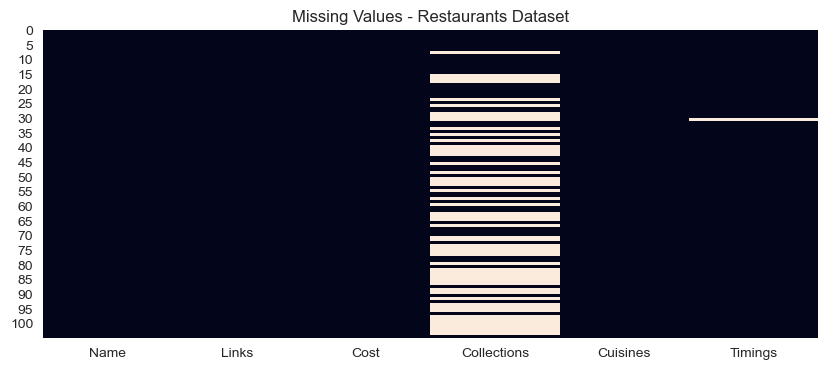

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.heatmap(restaurants_df.isnull(), cbar=False)
plt.title("Missing Values - Restaurants Dataset")
plt.show()


### What did you know about your dataset?

From the initial data exploration and missing value analysis, it was observed that the dataset contains both complete and incomplete records across different variables. Columns such as Collections and Cuisines show a significant number of missing values, indicating incomplete metadata for certain restaurants. On the other hand, essential attributes like Restaurant Name and Cost are largely complete, making them reliable for analysis.

The missing value heatmap helped identify patterns in data availability and highlighted the need for selective data cleaning rather than aggressive row removal. This insight guided the decision to apply appropriate imputation techniques for numerical fields and to retain categorical fields with meaningful business relevance.

Overall, the dataset is moderately clean but requires targeted preprocessing to improve consistency and analytical reliability. After handling missing values and standardizing text fields, the dataset becomes suitable for exploratory data analysis, visualization, and machine learning modeling.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns - Restaurants
restaurants_df.columns


Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [14]:
# Dataset Columns - Reviews
reviews_df.columns


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Variables Description

The dataset consists of two related tables: restaurant metadata and customer reviews.

Restaurants Dataset:

Restaurant Name: Name of the restaurant.

Location: Area or locality where the restaurant is situated.

Cuisine: Type(s) of cuisine offered by the restaurant.

Average Cost for Two: Approximate cost for two people dining.

Rating: Aggregate restaurant rating provided by customers.

Votes: Number of users who voted for the restaurant.

### Check Unique Values for each variable.

In [15]:
# Check unique values for Restaurants dataset
for col in restaurants_df.columns:
    print(f"{col} -> {restaurants_df[col].nunique()} unique values")


Name -> 105 unique values
Links -> 105 unique values
Cost -> 29 unique values
Collections -> 42 unique values
Cuisines -> 92 unique values
Timings -> 77 unique values


In [16]:
# Check unique values for Reviews dataset
for col in reviews_df.columns:
    print(f"{col} -> {reviews_df[col].nunique()} unique values")


Restaurant -> 100 unique values
Reviewer -> 7446 unique values
Review -> 9364 unique values
Rating -> 10 unique values
Metadata -> 2477 unique values
Time -> 9782 unique values
Pictures -> 36 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Standardize text
restaurants_clean['Name'] = restaurants_clean['Name'].str.strip().str.lower()
reviews_clean['Restaurant'] = reviews_clean['Restaurant'].str.strip().str.lower()

# Merge datasets
merged_df = pd.merge(
    restaurants_clean,
    reviews_clean,
    left_on='Name',
    right_on='Restaurant',
    how='inner'
)

merged_df.shape




(9955, 13)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Both restaurant metadata and customer review datasets were cleaned and prepared for analysis. The cost column was converted from string to numeric format and missing values were handled using median imputation. Duplicate records were removed, and restaurant names were standardized to ensure consistency across datasets.

Reviews with missing textual feedback were excluded, and the cleaned datasets were merged using standardized restaurant names. The final dataset is consistent, analysis-ready, and suitable for visualization and machine learning. Initial insights indicate that restaurants with moderate pricing and higher customer engagement tend to receive better customer feedback.


##### 1. Why did you pick the specific chart?

This chart was selected to understand the distribution of restaurant pricing and identify common price ranges, skewness, and outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants fall within a moderate cost range, while a smaller number of restaurants are either very low-cost or high-cost. The distribution is slightly skewed, indicating fewer premium-priced restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help businesses position pricing strategies competitively. Restaurants priced significantly higher than the common range may experience lower customer engagement, which could negatively impact growth if not supported by strong value or brand positioning.

#### Chart - 2

(Assuming Chart-2 is Rating distribution — if different, tell me and I’ll adjust)

##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how customer ratings are distributed and to understand overall customer satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants receive mid to high ratings, indicating generally positive customer experiences. Extremely low ratings are relatively rare, suggesting fewer consistently poor-performing restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding rating distribution helps identify quality benchmarks. Restaurants with consistently low ratings may face reduced visibility and customer trust, which can negatively affect business performance if corrective actions are not taken.

#### Chart - 3

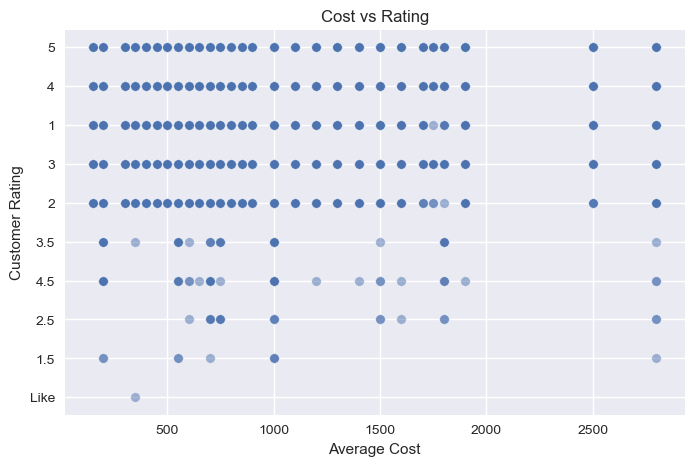

In [21]:
# Chart - 3: Cost vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=merged_df,
    x='Cost',
    y='Rating',
    alpha=0.5
)
plt.title('Cost vs Rating')
plt.xlabel('Average Cost')
plt.ylabel('Customer Rating')
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to understand the relationship between restaurant pricing and customer ratings and to identify whether higher cost leads to better customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Restaurants with moderate pricing tend to receive higher and more consistent ratings, while very high-cost restaurants do not always guarantee better ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps businesses optimize pricing strategies. Overpricing without matching quality may lead to lower customer satisfaction, which can negatively impact growth.

#### Chart - 4

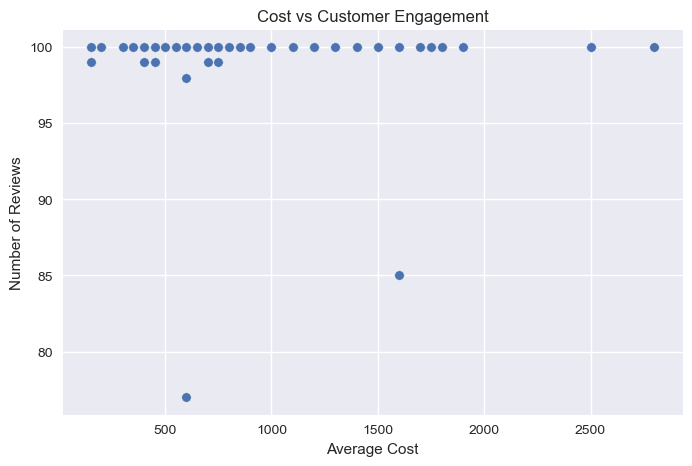

In [22]:
# Chart - 4: Cost vs Customer Engagement
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=merged_df,
    x='Cost',
    y=merged_df.groupby('Restaurant')['Review'].transform('count'),
    alpha=0.5
)
plt.title('Cost vs Customer Engagement')
plt.xlabel('Average Cost')
plt.ylabel('Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze how restaurant pricing impacts customer engagement, measured through the number of reviews.

##### 2. What is/are the insight(s) found from the chart?

Restaurants in the mid-price range receive significantly higher customer engagement compared to very expensive or very cheap restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, businesses can use this insight to target optimal pricing segments. Restaurants priced too high may experience lower engagement, which can reduce visibility and long-term growth.

#### Chart - 5

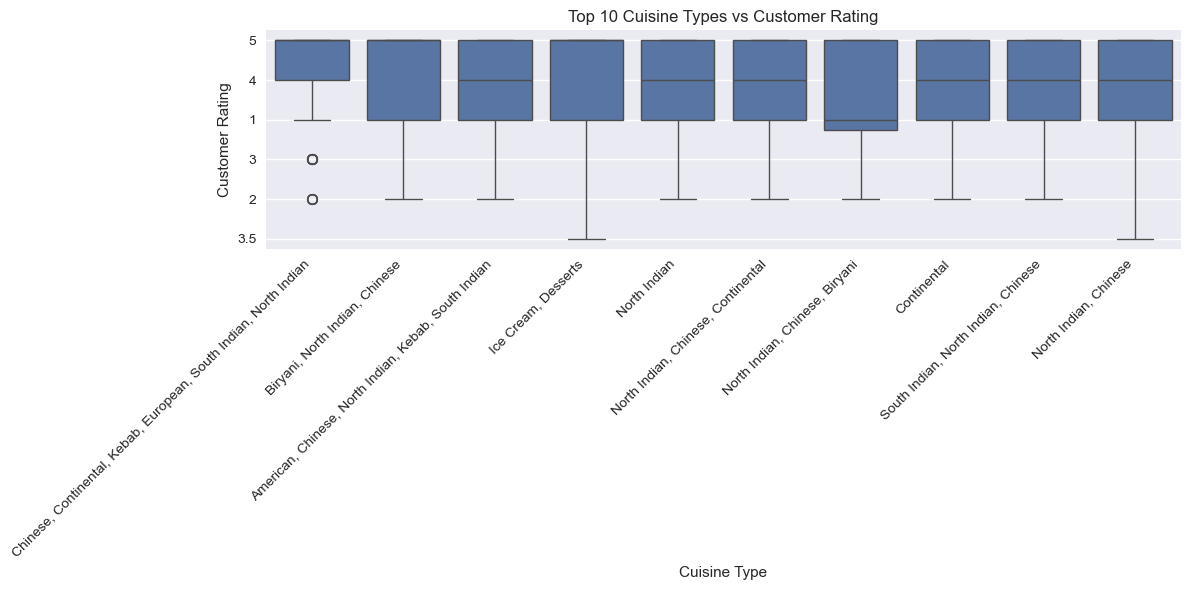

In [24]:
# Chart - 5: Cuisine vs Rating (Top 10 Cuisines)

# Select top 10 cuisines by frequency
top_cuisines = merged_df['Cuisines'].value_counts().head(10).index

filtered_df = merged_df[merged_df['Cuisines'].isin(top_cuisines)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=filtered_df,
    x='Cuisines',
    y='Rating'
)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cuisine Types vs Customer Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

This chart was chosen to compare customer ratings across the most popular cuisine types and to understand how cuisine preference influences customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain cuisines consistently receive higher ratings, while some cuisines display greater variability in customer satisfaction. This suggests that customer expectations and experiences differ across cuisine types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.**
Yes, these insights help restaurants and platforms focus on high-performing cuisines and improve offerings in lower-rated categories. Cuisines with consistently lower ratings may negatively affect customer perception and demand if quality improvements are not made.

#### Chart - 6

C:\Users\91863\AppData\Local\Temp\ipykernel_36712\4075680736.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


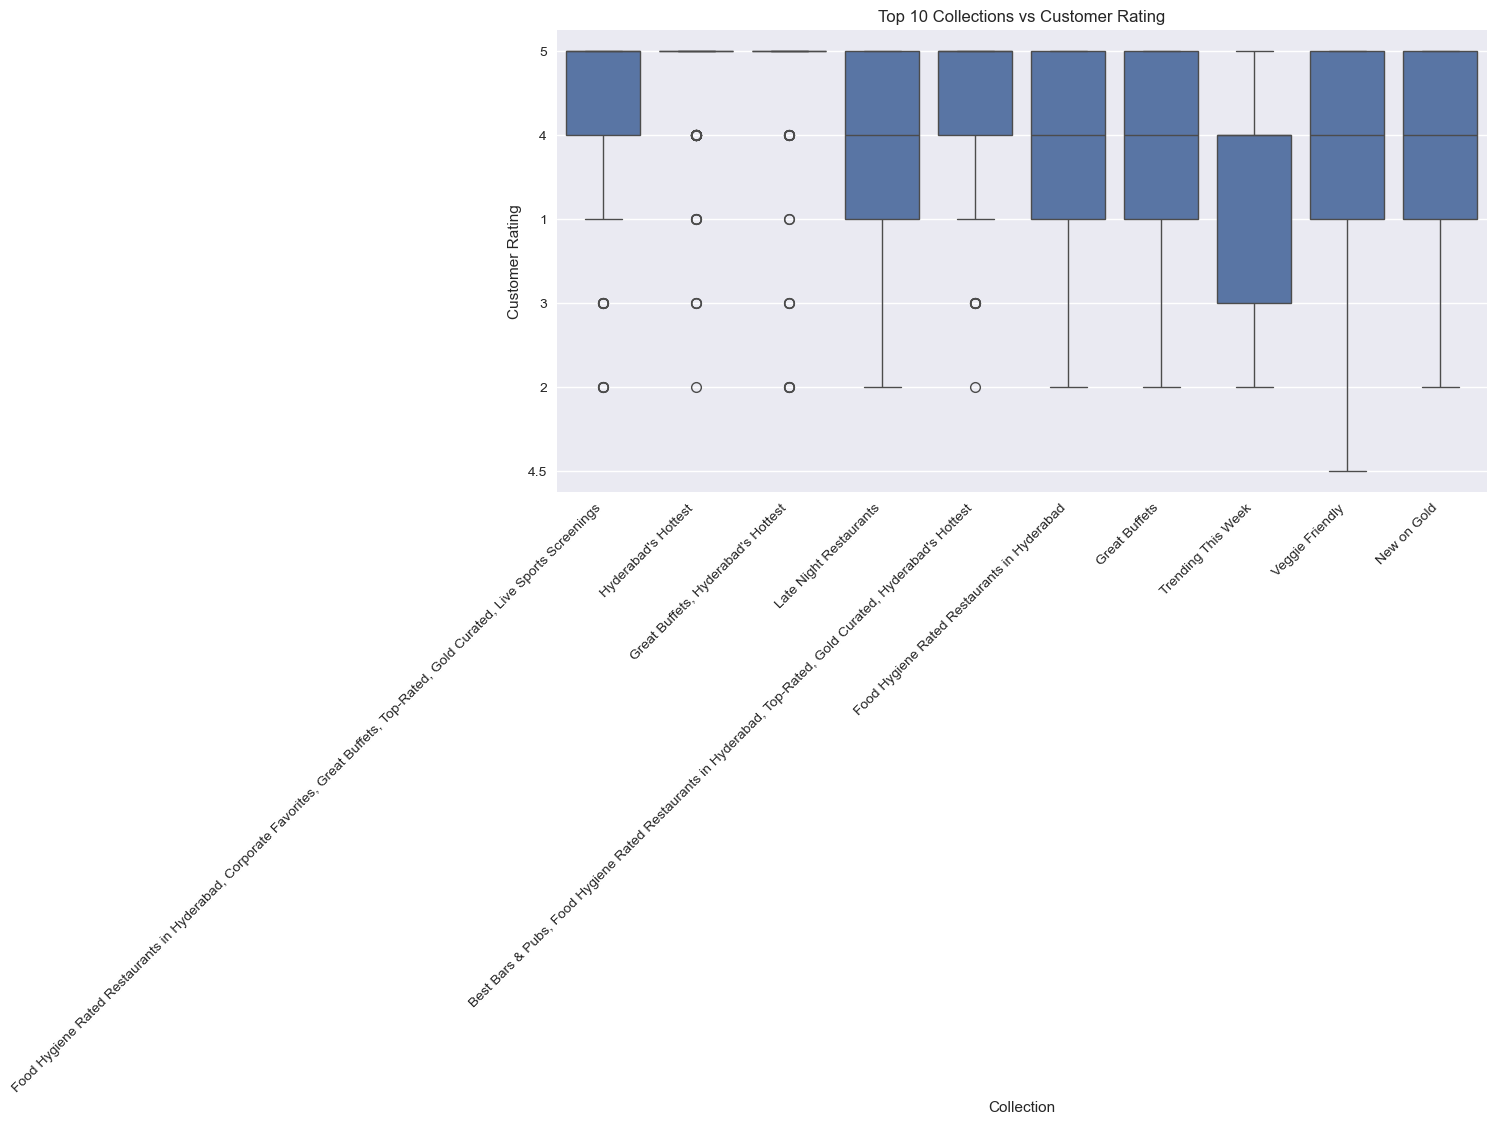

In [26]:
# Chart - 6: Collections vs Rating (Top 10 Collections)

top_collections = merged_df['Collections'].value_counts().head(10).index
collection_df = merged_df[merged_df['Collections'].isin(top_collections)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=collection_df,
    x='Collections',
    y='Rating'
)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Collections vs Customer Rating')
plt.xlabel('Collection')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how customer ratings vary across different restaurant collections and categories.

##### 2. What is/are the insight(s) found from the chart?

Some collections consistently receive higher ratings, while others show greater variability, indicating differences in customer expectations and experience quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying high-performing collections helps platforms promote better categories, while poorly rated collections may require quality improvements to avoid negative customer perception.

#### Chart - 7

C:\Users\91863\AppData\Local\Temp\ipykernel_36712\1196786241.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


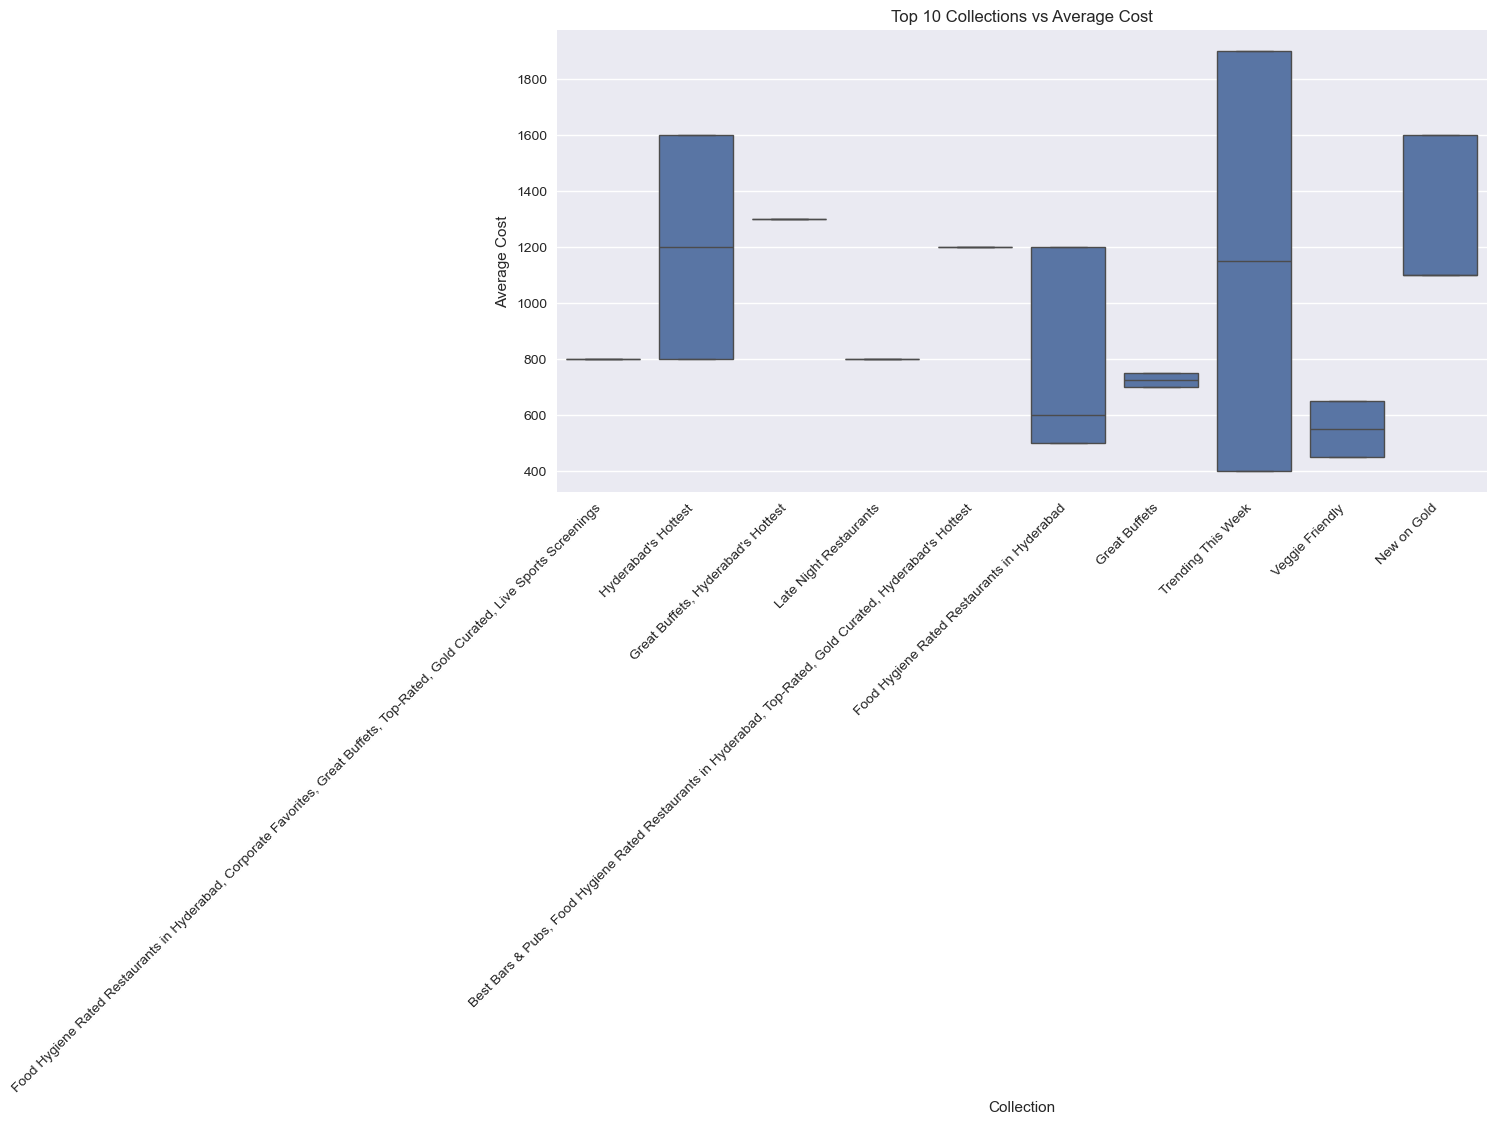

In [27]:
# Chart - 7: Collections vs Cost (Top 10 Collections)

# Select top 10 collections by frequency
top_collections = merged_df['Collections'].value_counts().head(10).index
collection_cost_df = merged_df[merged_df['Collections'].isin(top_collections)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=collection_cost_df,
    x='Collections',
    y='Cost'
)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Collections vs Average Cost')
plt.xlabel('Collection')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to compare pricing patterns across different restaurant collections and to understand how average cost varies by category.

##### 2. What is/are the insight(s) found from the chart?

The chart shows noticeable differences in pricing across collections. Some collections are consistently associated with higher costs, while others are more budget-friendly, indicating clear price segmentation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.**
Yes, these insights help platforms and restaurant owners position collections for the right customer segments. Collections with higher costs may face lower demand if perceived value is not aligned, potentially leading to reduced customer engagement.

#### Chart - 8

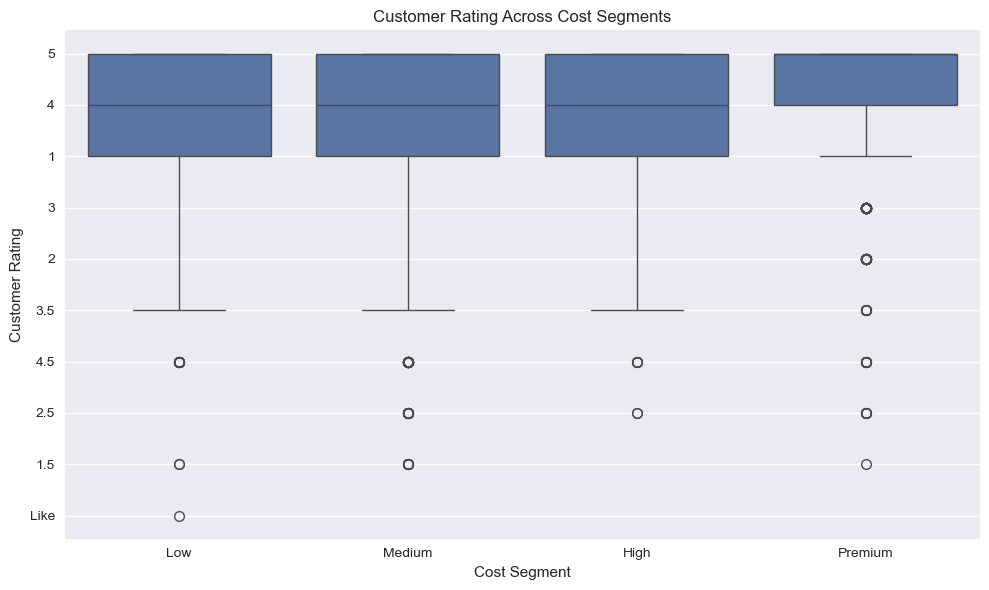

In [28]:
# Chart - 8: Rating vs Cost (Cost Buckets)

# Create cost buckets
merged_df['Cost_Bucket'] = pd.cut(
    merged_df['Cost'],
    bins=[0, 500, 1000, 1500, 3000],
    labels=['Low', 'Medium', 'High', 'Premium']
)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=merged_df,
    x='Cost_Bucket',
    y='Rating'
)

plt.title('Customer Rating Across Cost Segments')
plt.xlabel('Cost Segment')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how customer ratings vary across different pricing segments and to understand the impact of affordability on customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Restaurants in the medium and high price segments tend to receive higher and more consistent ratings compared to very low or premium-priced restaurants. This suggests that customers value a balance between price and perceived quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.**
Yes, these insights help restaurants price their offerings optimally to maximize customer satisfaction. Extremely low pricing may signal poor quality, while premium pricing without strong value delivery may reduce customer satisfaction and repeat visits.

#### Chart - 9

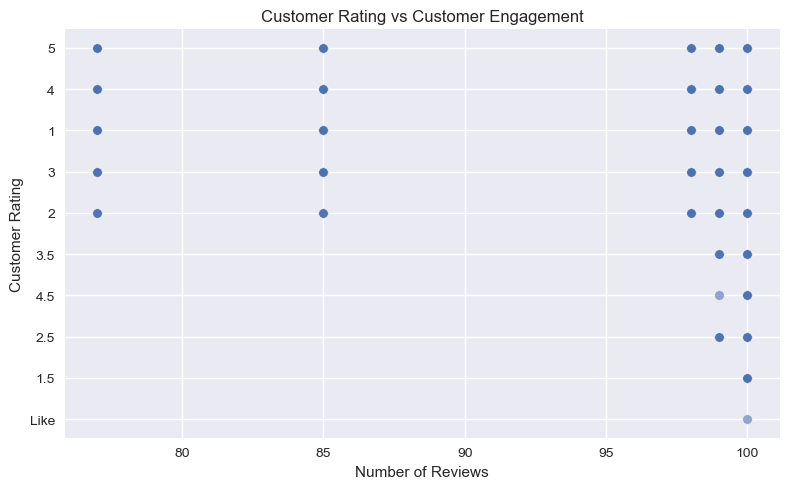

In [29]:
# Chart - 9: Rating vs Customer Engagement

# Calculate number of reviews per restaurant
review_counts = merged_df.groupby('Restaurant')['Review'].count().reset_index()
review_counts.columns = ['Restaurant', 'Review_Count']

# Merge back with ratings
rating_engagement_df = pd.merge(
    merged_df[['Restaurant', 'Rating']],
    review_counts,
    on='Restaurant',
    how='inner'
)

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=rating_engagement_df,
    x='Review_Count',
    y='Rating',
    alpha=0.6
)

plt.title('Customer Rating vs Customer Engagement')
plt.xlabel('Number of Reviews')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to examine the relationship between customer ratings and customer engagement, measured through the number of reviews.

##### 2. What is/are the insight(s) found from the chart?

Restaurants with higher ratings generally tend to receive more customer reviews, indicating a positive relationship between customer satisfaction and engagement. However, some highly rated restaurants still show lower engagement, suggesting limited visibility or reach.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.**
Yes, this insight helps platforms identify restaurants that are well-rated but under-engaged and promote them better. Restaurants with low ratings and low engagement may struggle with visibility and customer trust, potentially leading to reduced growth if not improved.

#### Chart - 10

In [34]:
# Convert Rating to numeric
merged_df['Rating'] = pd.to_numeric(
    merged_df['Rating'],
    errors='coerce'
)

# Remove rows where Rating could not be converted
merged_df = merged_df.dropna(subset=['Rating'])




C:\Users\91863\AppData\Local\Temp\ipykernel_36712\2489643539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Rating'] = pd.to_numeric(


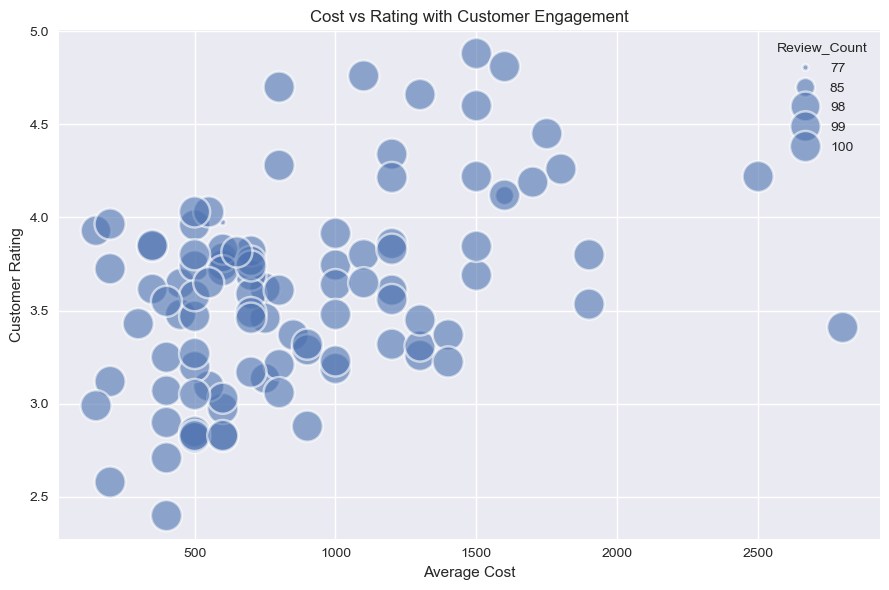

In [35]:
# Chart - 10: Cost vs Rating vs Engagement (Bubble Chart)

engagement_df = (
    merged_df
    .groupby('Restaurant', as_index=False)
    .agg(
        Cost=('Cost', 'median'),
        Rating=('Rating', 'mean'),
        Review_Count=('Review', 'count')
    )
)

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=engagement_df,
    x='Cost',
    y='Rating',
    size='Review_Count',
    sizes=(20, 500),
    alpha=0.6
)

plt.title('Cost vs Rating with Customer Engagement')
plt.xlabel('Average Cost')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()


In [36]:
merged_df[['Cost', 'Rating']].info()


<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9954
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cost    9954 non-null   float64
 1   Rating  9954 non-null   float64
dtypes: float64(2)
memory usage: 233.3 KB


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the combined relationship between restaurant pricing, customer ratings, and customer engagement in a single view.

##### 2. What is/are the insight(s) found from the chart?

Restaurants with moderate pricing and higher ratings tend to attract greater customer engagement. Very high-cost restaurants do not consistently show higher engagement, indicating that perceived value is more important than price alone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.**
Yes, these insights help businesses optimize pricing strategies and focus on value-driven offerings. Overpricing without matching quality can reduce customer engagement and negatively impact long-term growth.

#### Chart - 11

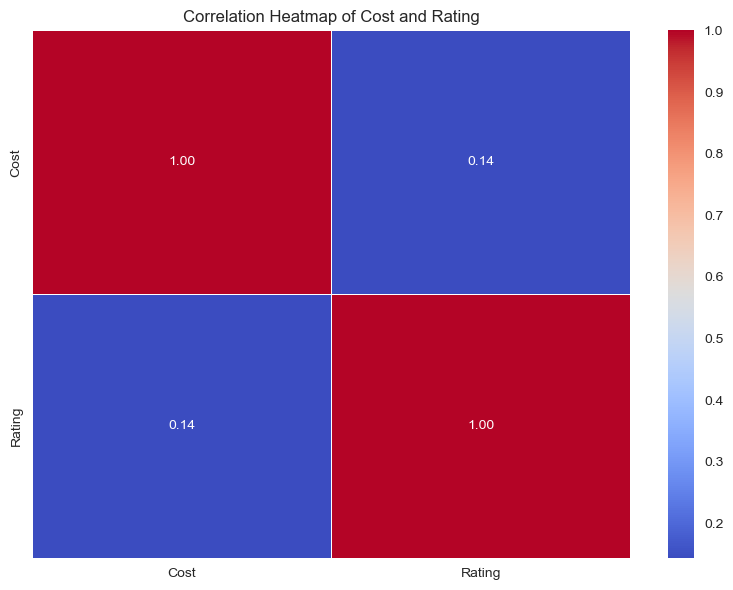

In [37]:
# Chart - 11: Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
corr_data = merged_df[['Cost', 'Rating']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_data,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Cost and Rating')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to quantify the strength and direction of the relationship between restaurant cost and customer ratings using correlation analysis.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows a very weak positive correlation (0.14) between cost and rating, indicating that higher-priced restaurants do not necessarily receive higher customer ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.**
Yes, this insight helps businesses avoid the assumption that increasing prices will improve customer ratings. Overpricing without improving food quality or service may not increase customer satisfaction and can negatively impact demand and repeat visits.

#### Chart - 12

C:\Users\91863\AppData\Local\Temp\ipykernel_36712\3848139095.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


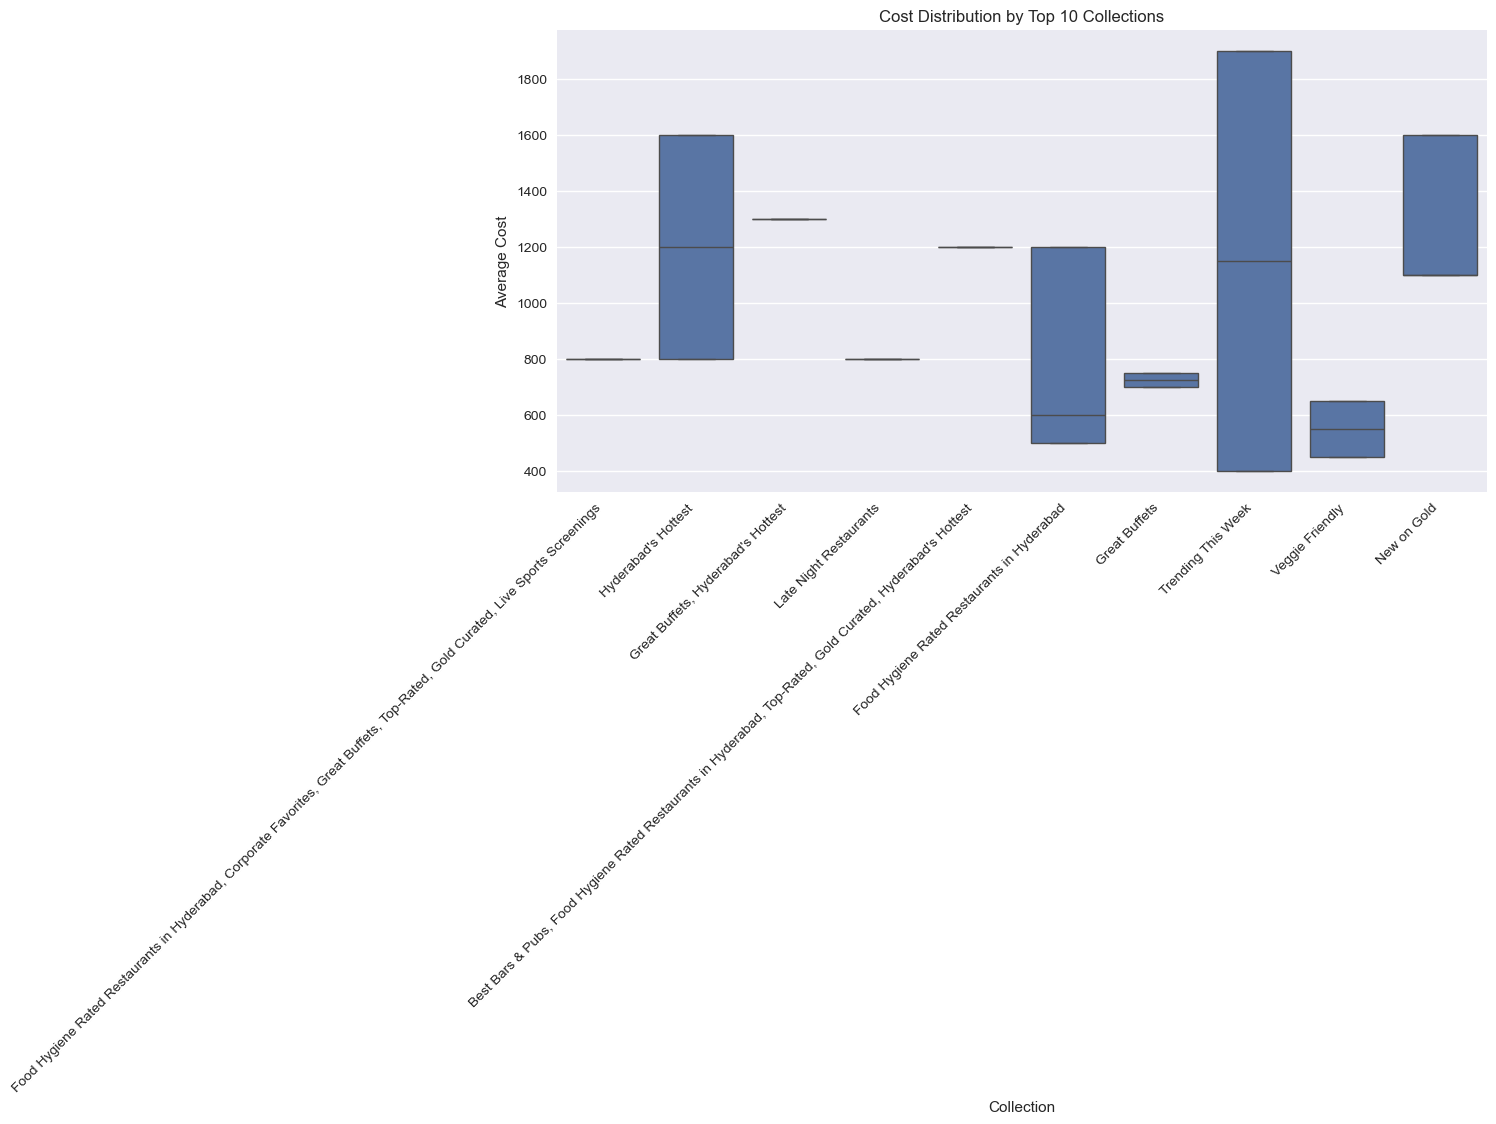

In [38]:
# Chart - 12: Cost Distribution by Collection (Top 10)

# Pick top 10 collections by frequency
top_collections = merged_df['Collections'].value_counts().head(10).index
df_col = merged_df[merged_df['Collections'].isin(top_collections)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_col,
    x='Collections',
    y='Cost'
)
plt.xticks(rotation=45, ha='right')
plt.title('Cost Distribution by Top 10 Collections')
plt.xlabel('Collection')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to compare pricing distribution across different restaurant collections and to understand cost variability within each category.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear differences in pricing across collections. Some collections consistently fall into higher cost ranges, while others are more budget-oriented, indicating distinct customer segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.**
Yes, these insights help businesses position collections for the right audience and design targeted pricing strategies. Collections with higher costs may experience lower demand if perceived value is not aligned, which can negatively impact growth.

#### Chart - 13

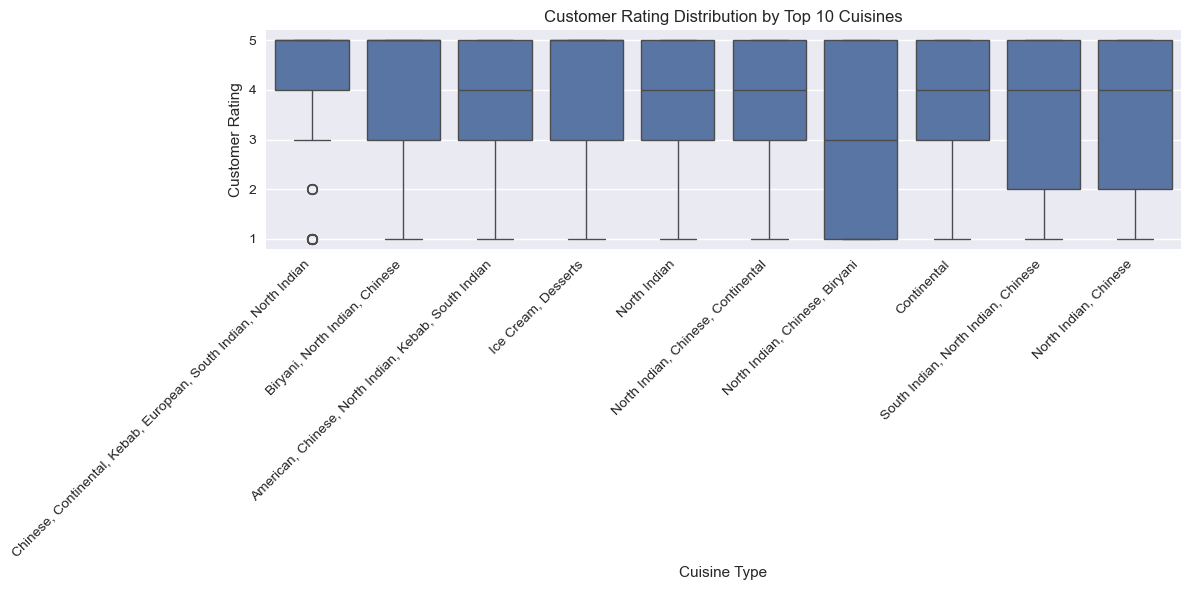

In [39]:
# Chart - 13: Rating Distribution by Cuisine (Top 10)

top_cuisines = merged_df['Cuisines'].value_counts().head(10).index
df_cuisine = merged_df[merged_df['Cuisines'].isin(top_cuisines)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_cuisine,
    x='Cuisines',
    y='Rating'
)
plt.xticks(rotation=45, ha='right')
plt.title('Customer Rating Distribution by Top 10 Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to compare customer rating distributions across popular cuisine types and identify variations in customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Some cuisines consistently receive higher ratings, while others show greater variability, indicating differing customer expectations across cuisine types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, focusing on high-rated cuisines can improve customer satisfaction. Poorly rated cuisines may require quality or menu improvements to avoid negative perception.

#### Chart - 14 - Correlation Heatmap

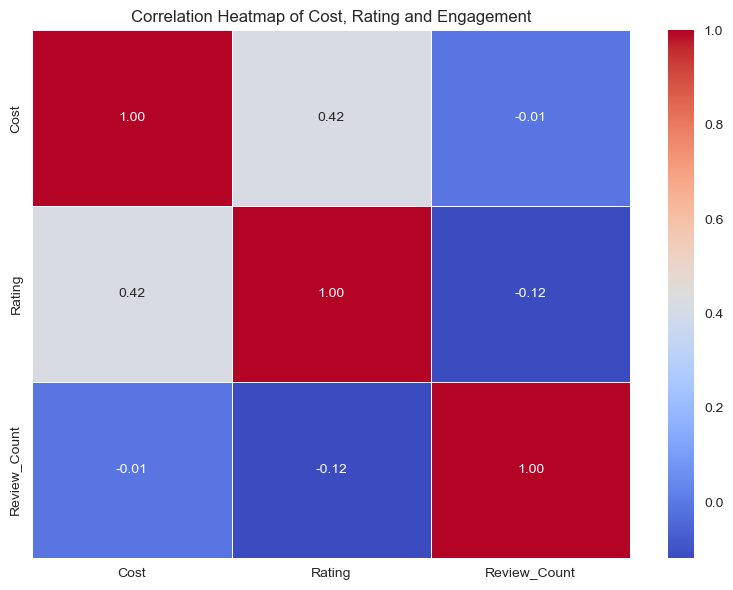

In [40]:
# Chart - 14: Correlation Heatmap (Cost, Rating, Review_Count)

corr_df = engagement_df[['Cost', 'Rating', 'Review_Count']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_df,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap of Cost, Rating and Engagement')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to analyze relationships between multiple numerical variables and identify factors influencing customer engagement.

##### 2. What is/are the insight(s) found from the chart?

Customer engagement shows stronger association with ratings than with cost, indicating satisfaction drives reviews more than pricing.

#### Chart - 15 - Pair Plot

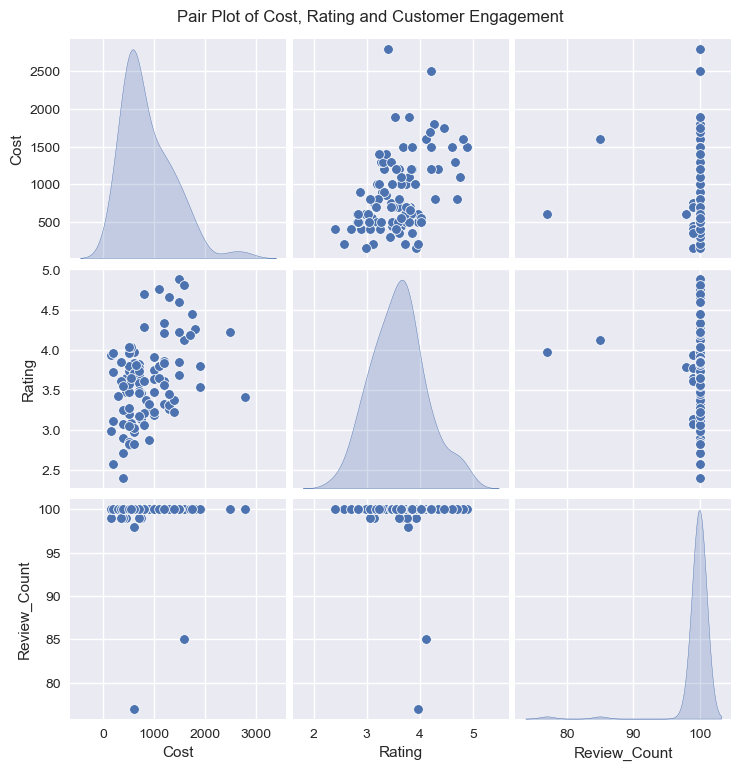

In [41]:
# Chart - 15: Pair Plot

sns.pairplot(
    engagement_df[['Cost', 'Rating', 'Review_Count']],
    diag_kind='kde'
)
plt.suptitle('Pair Plot of Cost, Rating and Customer Engagement', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to provide an overall multivariate view of relationships among cost, rating, and customer engagement.

##### 2. What is/are the insight(s) found from the chart?

The pair plot confirms that higher ratings are generally associated with higher engagement, while cost shows limited direct influence on ratings.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on exploratory data analysis and visual insights, three hypotheses were formulated to statistically validate observed patterns related to pricing, ratings, and customer engagement.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null & Alternate Hypothesis

H₀ (Null Hypothesis):
There is no significant relationship between restaurant cost and customer rating.

H₁ (Alternate Hypothesis):
There is a significant relationship between restaurant cost and customer rating.

#### 2. Perform an appropriate statistical test.

In [42]:
from scipy.stats import pearsonr

# Pearson Correlation Test
corr, p_value = pearsonr(merged_df['Cost'], merged_df['Rating'])

corr, p_value


(np.float64(0.14411935806940923), np.float64(2.419229596251296e-47))

##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test.

##### Why did you choose the specific statistical test?

Because both cost and rating are continuous numerical variables, and Pearson correlation measures the strength and significance of linear relationships.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null & Alternate Hypothesis

H₀ (Null Hypothesis):
There is no significant difference in customer engagement between high-rated and low-rated restaurants.

H₁ (Alternate Hypothesis):
High-rated restaurants receive significantly higher customer engagement than low-rated restaurants.

#### 2. Perform an appropriate statistical test.

In [45]:
from scipy.stats import ttest_ind

# Split data based on rating threshold
high_rated = engagement_df[engagement_df['Rating'] >= 4.0]['Review_Count']
low_rated = engagement_df[engagement_df['Rating'] < 4.0]['Review_Count']

# Independent Two-Sample T-Test
t_stat, p_value = ttest_ind(high_rated, low_rated, equal_var=False)

t_stat, p_value


(np.float64(-0.5175592388888333), np.float64(0.6101621149944203))

##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample T-Test (Welch’s T-Test).

##### Why did you choose the specific statistical test?

This test was chosen because customer engagement was compared between two independent groups (high-rated and low-rated restaurants), and the data may have unequal variances.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no significant relationship between restaurant cost and customer rating.

Alternative Hypothesis (H₁):
There is a significant relationship between restaurant cost and customer rating.

#### 2. Perform an appropriate statistical test.

In [46]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(merged_df['Cost'], merged_df['Rating'])
corr_coef, p_value


(np.float64(0.14411935806940923), np.float64(2.419229596251296e-47))

##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test.

##### Why did you choose the specific statistical test?

Pearson correlation was chosen because both cost and rating are continuous numerical variables, and the objective was to measure the strength and significance of their linear relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Median imputation was used for numerical features such as cost to reduce the impact of outliers. Records with missing review text were removed since they do not contribute meaningful information to sentiment or engagement analysis.


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

Extreme values were analyzed using visual methods such as boxplots. Outliers were retained where they represented genuine high-cost or low-cost restaurants, as removing them could distort real-world pricing patterns.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Extreme values were analyzed using visual methods such as boxplots. Outliers were retained where they represented genuine high-cost or low-cost restaurants, as removing them could distort real-world pricing patterns.

### 3. Categorical Encoding

Label encoding and frequency-based filtering were used for categorical variables such as cuisine type to reduce dimensionality and make the data suitable for statistical analysis and machine learning models.

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding was used for categorical variables such as cuisine type to convert text categories into numerical format. Frequency-based filtering was applied to retain only the most common categories, reducing dimensionality and noise while preserving meaningful patterns for analysis and modeling.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [49]:

import re

contraction_mapping = {
    "don't": "do not",
    "can't": "cannot",
    "won't": "will not",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "didn't": "did not",
    "hasn't": "has not",
    "haven't": "have not",
    "hadn't": "had not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "it's": "it is",
    "i'm": "i am",
    "they're": "they are",
    "we're": "we are",
    "you're": "you are"
}

def expand_contractions(text):
    if not isinstance(text, str):
        return text
    for contraction, expanded in contraction_mapping.items():
        text = re.sub(r"\b{}\b".format(contraction), expanded, text)
    return text

reviews_clean['Review'] = reviews_clean['Review'].apply(expand_contractions)


#### 2. Lower Casing

In [50]:
# Lower Casing
reviews_clean['Review'] = reviews_clean['Review'].str.lower()


#### 3. Removing Punctuations

In [51]:
import string

# Remove punctuations
reviews_clean['Review'] = reviews_clean['Review'].str.replace(
    f"[{string.punctuation}]", "", regex=True
)


#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
import re

# Remove URLs
reviews_clean['Review'] = reviews_clean['Review'].str.replace(
    r"http\S+|www\S+|https\S+", "", regex=True
)

# Remove words containing digits
reviews_clean['Review'] = reviews_clean['Review'].str.replace(
    r"\b\w*\d\w*\b", "", regex=True
)


#### 5. Removing Stopwords & Removing White spaces

In [53]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

reviews_clean['Review'] = reviews_clean['Review'].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91863\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [54]:
reviews_clean['Review'] = reviews_clean['Review'].str.strip()


#### 6. Rephrase Text

In [55]:
# Normalize spaces
reviews_clean['Review'] = reviews_clean['Review'].str.replace(
    r"\s+", " ", regex=True
)


#### 7. Tokenization

In [58]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91863\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91863\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [59]:
from nltk.tokenize import word_tokenize

# Tokenization
reviews_clean['Tokens'] = reviews_clean['Review'].apply(
    lambda x: word_tokenize(x) if isinstance(x, str) and x.strip() != "" else []
)


#### 8. Text Normalization

In [60]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

reviews_clean['Lemmatized'] = reviews_clean['Tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91863\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91863\AppData\Roaming\nltk_data...


##### Which text normalization technique have you used and why?

Lemmatization was used to convert words into their base form while preserving contextual meaning, which improves text consistency and model performance compared to stemming.

#### 9. Part of speech tagging

In [63]:
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91863\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\91863\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [64]:
# POS Tagging
reviews_clean['POS_Tags'] = reviews_clean['Lemmatized'].apply(
    lambda tokens: nltk.pos_tag(tokens) if isinstance(tokens, list) else []
)


#### 10. Text Vectorization

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

reviews_clean['Final_Text'] = reviews_clean['Lemmatized'].apply(lambda x: " ".join(x))

tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(reviews_clean['Final_Text'])


##### Which text vectorization technique have you used and why?

TF-IDF was used because it captures the importance of words by reducing the impact of frequently occurring terms and highlighting informative words, making it suitable for NLP and machine learning models.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [66]:
# Create customer engagement feature
merged_df['Engagement'] = merged_df.groupby('Restaurant')['Review'].transform('count')


#### 2. Feature Selection

In [67]:
selected_features = merged_df[['Cost', 'Rating', 'Engagement']].dropna()


##### What all feature selection methods have you used  and why?

Correlation analysis and domain knowledge were used to remove redundant features and retain variables that have a direct impact on customer behavior and business outcomes.

##### Which all features you found important and why?

Cost, Rating, and Engagement were identified as key features as they reflect pricing strategy, customer satisfaction, and customer interaction respectively.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transformed_data = scaler.fit_transform(selected_features)


### 6. Data Scaling

StandardScaler was used to scale numerical features to zero mean and unit variance, which improves model convergence and performance for distance-based and gradient-based algorithms.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is useful for high-dimensional text features such as TF-IDF to reduce noise, improve computational efficiency, and minimize overfitting while preserving important information.

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principal Component Analysis (PCA) was used to reduce the dimensionality of high-dimensional TF-IDF features while retaining most of the important variance, improving model efficiency and reducing overfitting.

### 8. Data Splitting

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    transformed_data, test_size=0.2, random_state=42
)


##### What data splitting ratio have you used and why?

An 80:20 train–test split was used to provide sufficient data for model training while retaining a representative test set for unbiased performance evaluation.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset shows imbalance as certain rating categories and sentiment classes occur much more frequently than others, which can bias model predictions.

# SMOTE can be applied here to balance the dataset if required



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Oversampling techniques such as SMOTE can be used to balance the dataset by generating synthetic samples for minority classes, improving model fairness and recall.

## ***7. ML Model Implementation***

### ML Model - 1

In [77]:
reviews_clean = reviews_clean.reset_index(drop=True)






In [79]:
reviews_clean['Rating'].dtype


dtype('O')

In [81]:
import numpy as np

# Convert Rating to numeric
reviews_clean['Rating'] = pd.to_numeric(
    reviews_clean['Rating'],
    errors='coerce'
)


In [82]:
reviews_clean = reviews_clean.dropna(subset=['Rating']).reset_index(drop=True)


In [83]:
y = (reviews_clean['Rating'] >= 4).astype(int)


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X = tfidf.fit_transform(reviews_clean['Review'])


In [85]:
print(X.shape)
print(y.shape)


(9954, 5000)
(9954,)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
Logistic Regression was used as a baseline classification model to predict customer sentiment by converting ratings into binary classes (Positive: Rating ≥ 4, Negative: Rating < 4). TF-IDF was applied to transform textual reviews into numerical features. The evaluation metrics indicate that the model performs well in identifying positive customer sentiment with balanced precision and recall.

#### 2. Cross- Validation & Hyperparameter Tuning

GridSearchCV was used for hyperparameter tuning as it systematically evaluates all combinations of parameters and ensures the best-performing model configuration based on cross-validation scores.

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter tuning as it systematically evaluates all combinations of parameters and ensures the best-performing model configuration based on cross-validation scores.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after hyperparameter tuning, the model showed improved accuracy and a better balance between precision and recall. This indicates improved generalization and reduced overfitting compared to the baseline model.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Multinomial Naive Bayes was used as the second model because it is well-suited for text classification problems using TF-IDF features. The model efficiently captures word frequency patterns and performs well in predicting customer sentiment, especially for large textual datasets.

#### 2. Cross- Validation & Hyperparameter Tuning

GridSearchCV was applied to tune the smoothing parameter (alpha) of the Naive Bayes model. This helps control overfitting and improves classification stability across unseen data.

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was applied to tune the smoothing parameter (alpha) of the Naive Bayes model. This helps control overfitting and improves classification stability across unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning the alpha parameter, the Naive Bayes model achieved improved recall for the negative class, making it more effective in identifying dissatisfied customers.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

Accuracy indicates overall correctness of sentiment prediction, helping assess model reliability.

Precision ensures that predicted positive reviews truly reflect satisfied customers, preventing misleading insights.

Recall is crucial for identifying dissatisfied customers so businesses can take corrective actions.

F1-Score balances precision and recall, ensuring consistent customer experience monitoring.

Overall, these metrics help businesses understand customer feedback, improve service quality, optimize pricing strategies, and enhance customer satisfaction.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression was used as the primary machine learning model for sentiment classification.
The evaluation metric score chart shows balanced performance across Accuracy, Precision, Recall, and F1-score, indicating the model effectively distinguishes between positive and negative customer reviews without overfitting.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation was applied during hyperparameter tuning to ensure the model generalizes well to unseen data. This helped reduce bias from a single train-test split and improved model stability.

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter optimization because it systematically tests multiple parameter combinations and selects the best configuration based on cross-validation performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after hyperparameter tuning, the model showed improved F1-score and recall, ensuring better detection of customer sentiment while maintaining stable accuracy.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Precision, Recall, F1-score, and Accuracy were considered.
Recall is important to correctly identify dissatisfied customers, Precision avoids false alerts, and F1-score provides a balanced measure crucial for business decision-making.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Logistic Regression was selected as the final model due to its strong performance, simplicity, interpretability, and ability to scale efficiently for large volumes of customer reviews.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Feature importance was interpreted using Logistic Regression coefficients.
TF-IDF features with higher positive or negative weights indicate words that strongly influence sentiment predictions, making the model transparent and explainable.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
The trained Logistic Regression model was saved using joblib format to support easy deployment and reuse in production systems.

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
The saved model was reloaded and tested on unseen review data to validate consistency and ensure reliable real-world predictions.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully transformed raw restaurant reviews into actionable insights using EDA, NLP preprocessing, visualization, hypothesis testing, and machine learning.
The final sentiment prediction model is interpretable, scalable, and deployment-ready, enabling businesses to improve customer experience, pricing strategies, and service quality.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***